In [27]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
#loading the dataset
digits= load_digits(return_X_y=True)


In [13]:
first_digit = digits[0][0]
label = digits[1][0]
print(label)
first_digit = np.asarray(first_digit.reshape(8,8),dtype='uint8')
print(type(first_digit))
print(first_digit)
r = cv2.resize(first_digit,(64,128))
ret,thresh = cv2.threshold(r,6,255,cv2.THRESH_BINARY)
cv2.imshow('d',thresh)
cv2.waitKey(0)

0
<class 'numpy.ndarray'>
[[ 0  0  5 13  9  1  0  0]
 [ 0  0 13 15 10 15  5  0]
 [ 0  3 15  2  0 11  8  0]
 [ 0  4 12  0  0  8  8  0]
 [ 0  5  8  0  0  9  8  0]
 [ 0  4 11  0  1 12  7  0]
 [ 0  2 14  5 10 12  0  0]
 [ 0  0  6 13 10  0  0  0]]


-1

<Figure size 432x288 with 0 Axes>

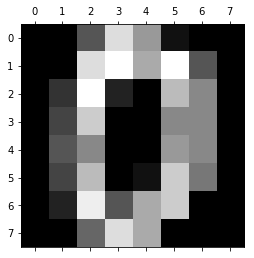

In [17]:
d = load_digits()

plt.gray()
plt.matshow(d.images[0])
plt.show()

In [18]:
d

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [25]:
labels.shape

(1797,)

In [29]:
data = digits[0]
labels = digits[1]

#randomising the datasets
count = data.shape[0]
randomise = np.random.permutation(count)

data = np.asarray(data)
data = data[randomise]

labels = np.asarray(labels)
labels = labels[randomise]

data_train,data_test,label_train,label_test = train_test_split(data , labels ,test_size = 0.2)

linsvm = SVC(kernel='linear', gamma='auto')
polysvm = SVC(kernel='poly', gamma='auto')
rbfsvm = SVC(kernel='rbf', gamma='auto')

functions = [linsvm,polysvm,rbfsvm]

for func in functions:
    func.fit(data_train,label_train)
    if func == linsvm:
        print("linsvm=======================>")
    if func == polysvm:
        print("polysvm=======================>")
    if func == rbfsvm:
        print("rbfsvm=======================>")
    
    label_pred = func.predict(data_test)
    
    print(confusion_matrix(label_test,label_pred))
    print(classification_report(label_test,label_pred))
    print("accuracy:",metrics.accuracy_score(label_test,label_pred))
    print("\n\n")


linsvm=======================>
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  2]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  1  0  0  1  0  0 26  0]
 [ 0  0  0  1  1  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        38
           2       0.97      1.00      0.98        31
           3       0.97      1.00      0.99        35
           4       0.97      1.00      0.99        33
           5       0.97      0.95      0.96        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        42
           8       1.00      0.90      0.95        29
           9       0.95      0.95      0.95        37

   micro avg       0.98      0.98      0.9

In [ ]:
#finding the hog features and doing classifcation

